# Real Estate Price Prediction Project

## Introduction
Creating a Machine Learning model to predict the home prices in Lahore, Pakistan. We are going to use the dataset from Kaggle.com.
We are also going to create a simple user interface which will provide access to our model for predictions.

Below data science concepts we used in this project
* Data loading and cleaning
* Outlier detection and removal
* Feature engineering
* Dimensionality reduction
* K fold cross validation

Technology and tools used in this project
* Python
* Numpy and Pandas for data cleaning
* Matplotlib for data visualization
* Sklearn for model building
* Google Colaboratory Notebook

## IN GENERAL:
      We will build a model using sklearn and linear regression using home prices dataset from kaggle.com.




#Step#1: Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5,5) # width, height in inches
from google.colab import files
import io

#Step#2: Load the data
* Load the data in dataframe

In [ ]:
#Uploading file
uploaded = files.upload()

Saving housing_prediction.csv to housing_prediction.csv


In [ ]:
df1 = pd.read_csv(io.StringIO(uploaded['housing_prediction.csv'].decode('utf-8')))
df1.head()

,area_type,availability,location,size,block,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Samnabad,2 BHK,Block I,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Gulberg,4 Bedroom,Block E,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Cantt,3 BHK,Block L,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Old City,3 BHK,Block J,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Gulberg,2 BHK,Block D,1200,2.0,1.0,51.00


#Step#3: Understand the data
* Finalize the columns to work with and drop the rest of them

In [ ]:
# Get the no of rows and columns
df1.shape

(13320, 9)

In [ ]:
#Get all the column names
df1.columns.unique()

Index(['area_type', 'availability', 'location', 'size', 'block', 'total_sqft',
       'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
#Lets check the unique values 'area_type' column
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
#DIsplay all available locations in our dataset
df1.location.unique()

array(['Samnabad', 'Gulberg', 'Cantt', 'Old City', 'Bahria Town',
       'Others', 'Iqbal Town', 'Wapda Town', 'Garden Town', nan,
       'Model Town', 'Askari', 'DHA', 'Johar Town', 'Valencia', 'NFC'],
      dtype=object)

In [ ]:
#Let get the count of trianing examples for each area type
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

## Dropping the columns
* As such all the columns are important for price prediction, but for the sake of this project We are going to drop few columns

In [ ]:
# Note everytime we make change in dataset we store it in new dataframe
df2 = df1.drop(['area_type', 'availability', 'block', 'balcony'],axis='columns')

print('Rows and columns are = ', df2.shape)
df2.head()

Rows and columns are =  (13320, 5)


,location,size,total_sqft,bath,price
0,Samnabad,2 BHK,1056,2.0,39.07
1,Gulberg,4 Bedroom,2600,5.0,120.00
2,Cantt,3 BHK,1440,2.0,62.00
3,Old City,3 BHK,1521,3.0,95.00
4,Gulberg,2 BHK,1200,2.0,51.00


#Step#4: Data Cleaning
* Check for na values
* Verify unique values of each column
* Make sure values are correct (eg. 23 BHK home with only 2000 Sqrft size seems wrong)

## Handling null values

In [ ]:
# Get the sum of all na values from dataset
df2.isna().sum()

location      42
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since null values as comapre to total training examples(13320) is verry less we can safly drop those examples

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
# Since all oor training examples containing null values are dropped lets check the shape of the dataset again
df3.shape

(13205, 5)

## Feature Engineering
* 'size' column contgaines the size of house in terms of BHK( Bedroom Hall Kitchen)
* To simply it we can create new column by the name 'bhk' and add only numeric value of how many BHK's

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df4 = df3.copy()

# Using lambda function we can get the BHK numeric value
df4['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df4.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

From above data we can see that there are home with upto 43 BHK's in Lahore

In [ ]:
#Get the training examples with home size more than 20 BHK
df4[df4.bhk >20]

,location,size,total_sqft,bath,price,bhk
1718,Johar Town,27 BHK,8000,27.0,230.0,27
4684,Samnabad,43 Bedroom,2400,40.0,660.0,43


Note above 43 BHK home area is only 2400 sqrft only. We will remove this data error later. First lets clean the 'total_sqft' column

Now lets check the unique values in 'total_sqft' column

In [ ]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Note above, there are few records with range of the area like '1133 - 1384'.
Lets write a function to identify such values

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False

  return True

In [ ]:
# Test the function
print('is this (123) float value = %s' % (is_float(123)))
print('is this (1133 - 1384) float value = %s' % (is_float('1133 - 1384')))

is this (123) float value = True
is this (1133 - 1384) float value = False


In [ ]:
#Lets apply this function to 'total_sqft' column

#Showing training examples where 'total_sqft' vale is not float
df4[~df4['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Old City,4 BHK,2100 - 2850,4.0,186.000,4
122,DHA,4 BHK,3067 - 8156,4.0,477.000,4
137,Johar Town,2 BHK,1042 - 1105,2.0,54.005,2
165,DHA,2 BHK,1145 - 1340,2.0,43.490,2
188,Bahria Town,2 BHK,1015 - 1540,2.0,56.800,2
410,Johar Town,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,DHA,2 BHK,1195 - 1440,2.0,63.770,2
648,Wapda Town,9 Bedroom,4125Perch,9.0,265.000,9
661,Wapda Town,2 BHK,1120 - 1145,2.0,48.130,2
672,Others,4 Bedroom,3090 - 5002,4.0,445.000,4


* Since most the value are range of sqft, we can write afunction to get the average value from a range.
* There are few values like '34.46Sq. Meter' and '4125Perch' we can also try and convert those values into sqft but for now I amgoing to ignore them

In [ ]:
def convert_range_to_sqft(x):
  try:
    tokens = x.split('-')

    if len(tokens) == 2:
      return (float(tokens[0]) + float(tokens[1]))/2
    else:
      return float(x)
  except:
    return None

In [ ]:
#Lets test the convert_range_to_sqft()
print('Return value for i/p 12345 = %s' % (convert_range_to_sqft('12345')))
print('Return value for i/p 1133 - 1384 = %s' % (convert_range_to_sqft('1133 - 1384')))
print('Return value for i/p 34.46Sq. Meter = %s' % (convert_range_to_sqft('34.46Sq. Meter')))

Return value for i/p 12345 = 12345.0
Return value for i/p 1133 - 1384 = 1258.5
Return value for i/p 34.46Sq. Meter = None


In [ ]:
# Lets apply this function for total_sqft column
df5 = df4.copy()

df5.total_sqft = df4.total_sqft.apply(convert_range_to_sqft)
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Samnabad,2 BHK,1056.0,2.0,39.07,2
1,Gulberg,4 Bedroom,2600.0,5.0,120.00,4
2,Cantt,3 BHK,1440.0,2.0,62.00,3
3,Old City,3 BHK,1521.0,3.0,95.00,3
4,Gulberg,2 BHK,1200.0,2.0,51.00,2


In [ ]:
# Since our converion function will return null for values like 34.46Sq. Meter. Lets check for any null values in it
df5.total_sqft.isnull().sum()

46

In [ ]:
# Lets dro the null training sets from total_sqft
df6 = df5.dropna()
df6.total_sqft.isnull().sum()

# OR
#We can also select the not null training set using below filter
#df6 = df5[df5.total_sqft.notnull()]

0

In [ ]:
# Lets cross check the values of 'total_sqft'
print('total_sqft value for 30th training set in df4 = %s' % (df4.total_sqft[30]))
print('total_sqft value for 30th training set in df6 = %s' % (df6.total_sqft[30]))

total_sqft value for 30th training set in df4 = 2100 - 2850
total_sqft value for 30th training set in df6 = 2475.0


## Feature Engineering
* 'price' column containes the price of house in lacka ( 1 lakh = 100000)
* Price per square fit is important parameter in house prices.
* So we can create new column by the name 'price_per_sqft' and add price per sqft in it. formula = (price * 100000)/total_sqft

In [ ]:
df7 = df6.copy()

df7['price_per_sqft'] = (df6['price'] * 100000)/df6['total_sqft']
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Samnabad,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Gulberg,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Cantt,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Old City,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Gulberg,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df7_stats = df7['price_per_sqft'].describe()
df7_stats

count    1.315900e+04
mean     7.923629e+03
std      1.068930e+05
min      2.678298e+02
25%      4.269249e+03
50%      5.434783e+03
75%      7.315625e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## Dimesionality Reduction
* Dimensionality reduction is simply a process of reducing the dimension( or number of random variables) of your feature set
* In our dataset 'location' is categorical variable with 1287 categories.
* Before using One Hot Encoding to create dummy variables we must reduce the number of categories by using dimensionality reduction so that we will get less number of dummy variables.
* Our criteria for dimesionality reduction for 'location' is to use 'other' location for any location having less than 10 data points.


In [ ]:
#Trim the location values
df7.location = df7.location.apply(lambda x: x.strip())
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Samnabad,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Gulberg,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Cantt,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Old City,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Gulberg,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
#Lets get the count of each location
location_stats = df7.location.value_counts(ascending=False)
location_stats

Johar Town     922
DHA            921
Bahria Town    918
Iqbal Town     890
Garden Town    888
Valencia       887
Wapda Town     881
NFC            879
Askari         873
Cantt          865
Samnabad       854
Model Town     854
Others         846
Gulberg        845
Old City       836
Name: location, dtype: int64

In [ ]:
#Total number unique location categories are
len(location_stats)

15

We are going assign a category 'other' for every location where total datapoints are less than 10

In [ ]:
#Get total number of categories where data points are less than 10
print('Total no of locations where data points are more than 10 = %s' % (len(location_stats[location_stats > 10])))
print('Total no of locations where data points are less than 10 = %s' % (len(location_stats[location_stats <= 10])))

Total no of locations where data points are more than 10 = 15
Total no of locations where data points are less than 10 = 0


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [ ]:
location_stats_less_than_10 = location_stats[location_stats <= 1]
location_stats_less_than_10

Series([], Name: location, dtype: int64)

In [ ]:
#Using lambda function assign the 'other' type to every element in 'location_stats_less_than_10'
df8 = df7.copy()

df8.location = df7.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df8.location.unique())

15

Since 1047 location with less than 10 data points are converted to one category 'other'
Total no of unique location categories are = 240 +1  = 241

In [ ]:
df8.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Samnabad,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Gulberg,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Cantt,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Old City,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Gulberg,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Bahria Town,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Cantt,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Others,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Old City,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Iqbal Town,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal
* An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.
* Outliers are the data points that represent the extreame variation of dataset
* Outliers can be valid data points but since our model is generalization of the data, outliers can affect the performanace of the model. We are going to remove the otliers, but please note its not always a good practice to remove the outliers.
* To remove the outliers we can use domain knwoledge and standard deviation

### Standard Deviation
* Standard deviation is measure of spread that is to khow how much does the data vary from the average
* A low standard deviation tells us that the data is closely clustered around the mean (or average), while a high standard deviation indicates that the data is dispersed over a wider range of values.
* It is used when the distribution of data is approximately normal, resembling a bell curve.
* One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.e. Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%
* Here we are going to consider 1 Sigma as our threshold adn any data outside 1 Sigma will be considered as outlier
* [How to Use Statistics to Identify Outliers in Data](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
* [Reference](https://youtu.be/MRqtXL2WX2M)

### Using domain knowledge for outlier removal
* Normally square fit per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
* If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
* We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

### Using domain knowledge for outlier removal


In [ ]:
# Lets visualize the data where square fit per bedroom is less than 300
df8[(df8.total_sqft / df8.bhk) < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Iqbal Town,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Others,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,NFC,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Johar Town,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Valencia,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Askari,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Model Town,5 Bedroom,774.0,5.0,70.0,5,9043.927649


Note abobe we have 744 training examples where square fit per bedroom is less than 300. These are outliers, so we can remove them

In [ ]:
#Lets check current dataset shape before removing outliers
df8.shape

(13159, 7)

In [ ]:
df9 = df8[~((df8.total_sqft / df8.bhk) < 300)]
df9.shape

(12416, 7)

### Outlier Removal - Using Standard Deviation and Mean
* One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.
e. Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%
* Here any datapin t outside the 1 Sigma deviation (68%) is outlier for us

In [ ]:
# Get basic stats of column 'price_per_sqft'
df9.price_per_sqft.describe()

count     12416.000000
mean       6307.001135
std        4166.457049
min         267.829813
25%        4210.526316
50%        5293.105740
75%        6914.756186
max      176470.588235
Name: price_per_sqft, dtype: float64

Note: Its important to understand that price of every house is location specific. We are going to remove outliers using 'price_per_sqft' for each location

Text(0, 0.5, 'Count')

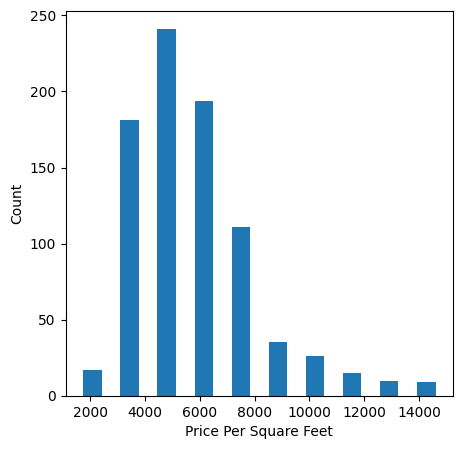

In [ ]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar'
# Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here
filtered_data = df9[(df9.location == "Johar Town") & (df9.price_per_sqft < 15000)]
plt.hist(filtered_data.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
#Lets check current dataset shape before removing outliers
df9.shape

(12416, 7)

In [ ]:
# Function to remove outliers using pps(price per sqft)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return df_out

df10 = remove_pps_outliers(df9)
df10.shape

(11117, 7)

Text(0, 0.5, 'Count')

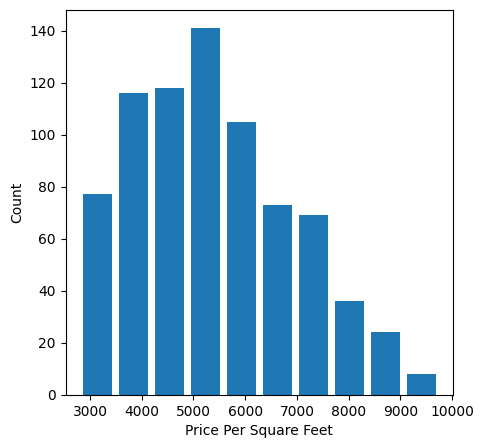

In [ ]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar' after outlier removal
plt.hist(df10[df10.location == "Johar Town"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Using domain knowledge for outlier removal
* If location and square foot area is aslo same then price of 3BHK should be more than 2 BHK
* There are other factors that also affect the price but for this exercise we are treating such values as outlier and remove them

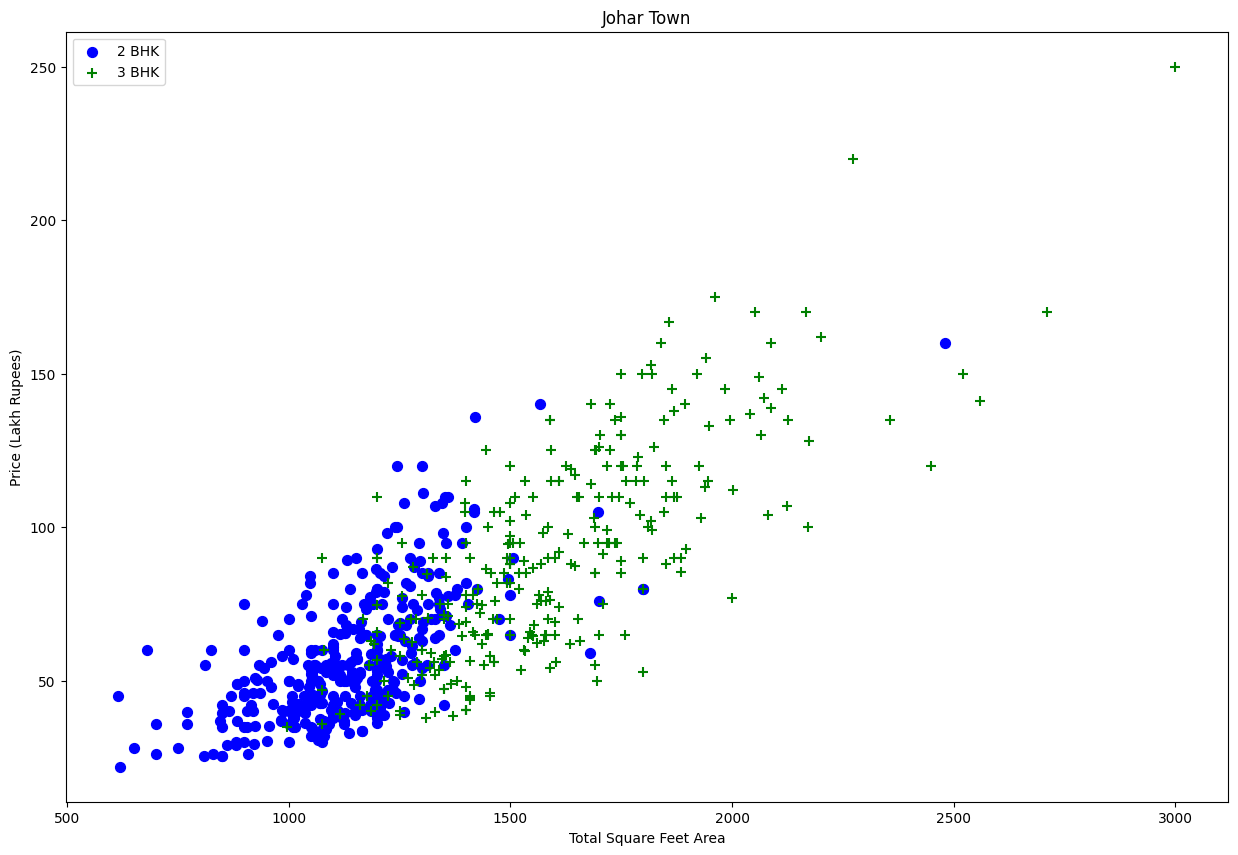

In [ ]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df10,"Johar Town")

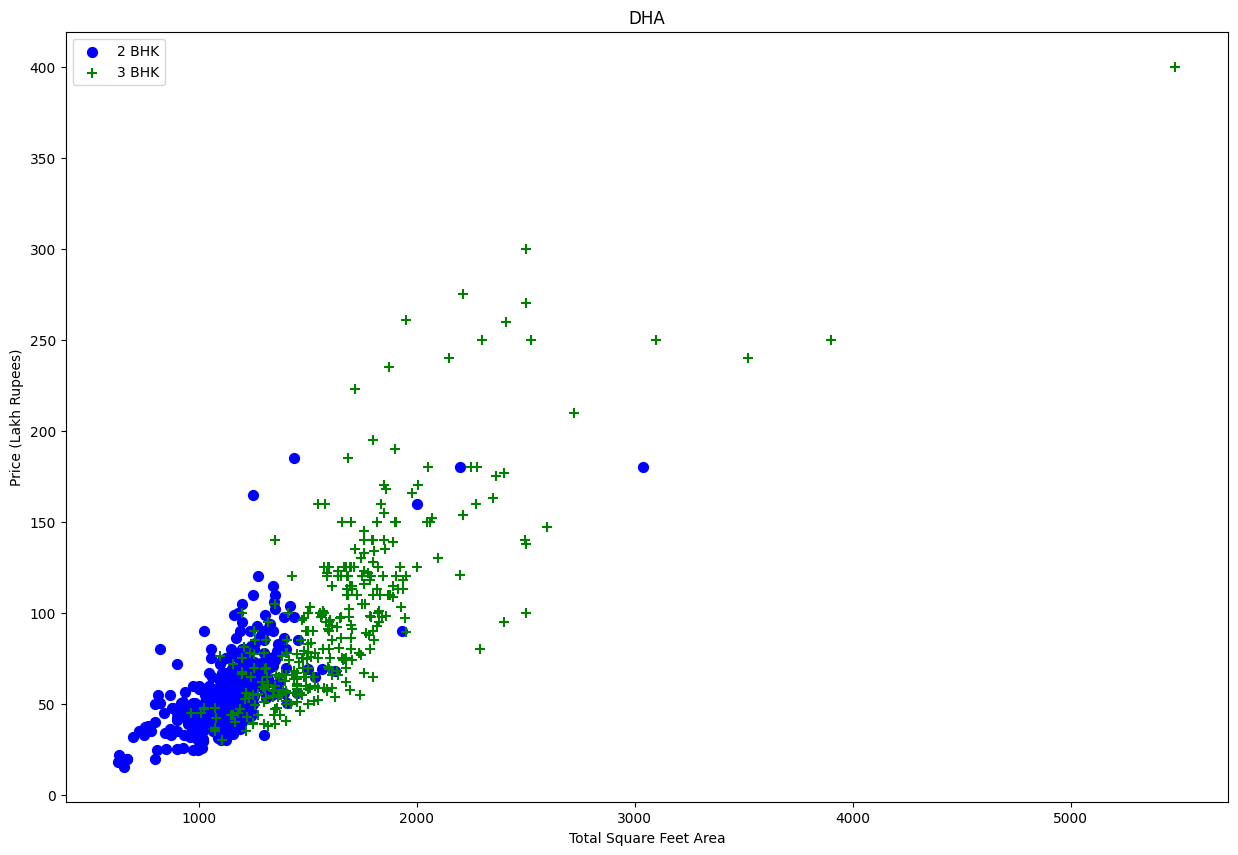

In [ ]:
plot_scatter_chart(df10,"DHA")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary by name 'bhk_stats' with below values of 'price_per_sqft'

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df11 = remove_bhk_outliers(df10)
df11.shape

(5882, 7)

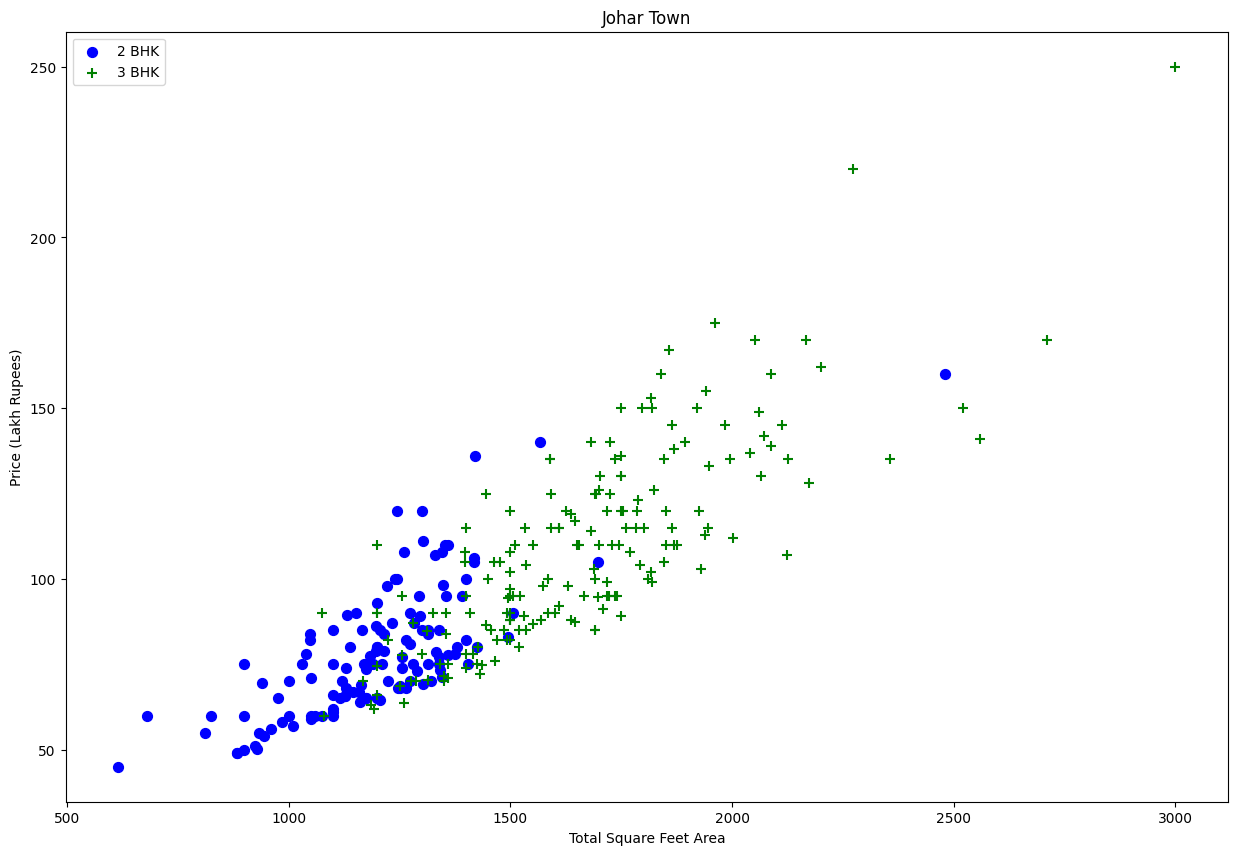

In [ ]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df11,"Johar Town")

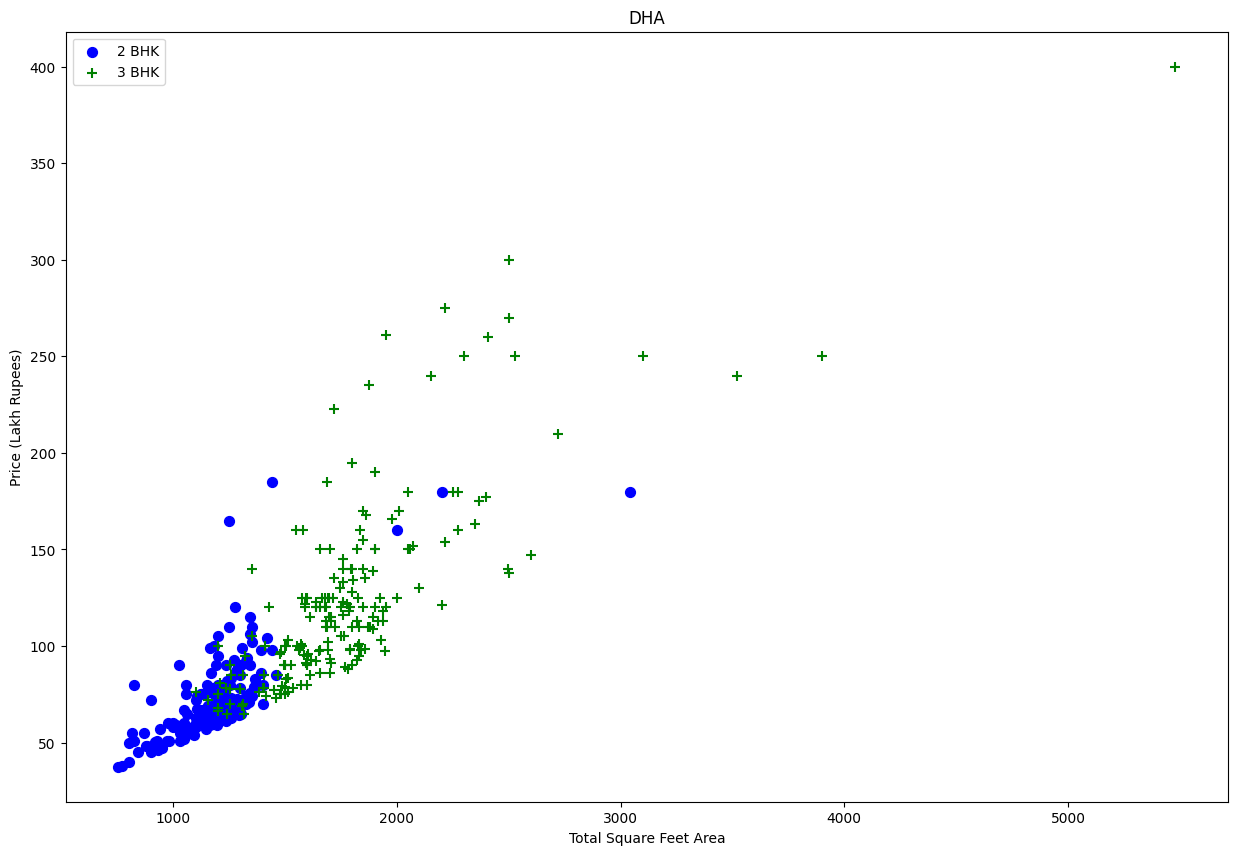

In [ ]:
plot_scatter_chart(df11,"DHA")

Now you can campre the scatter plots for location(Hebbal and Rajaji Nagar) for before and after outlier removal

Text(0, 0.5, 'Count')

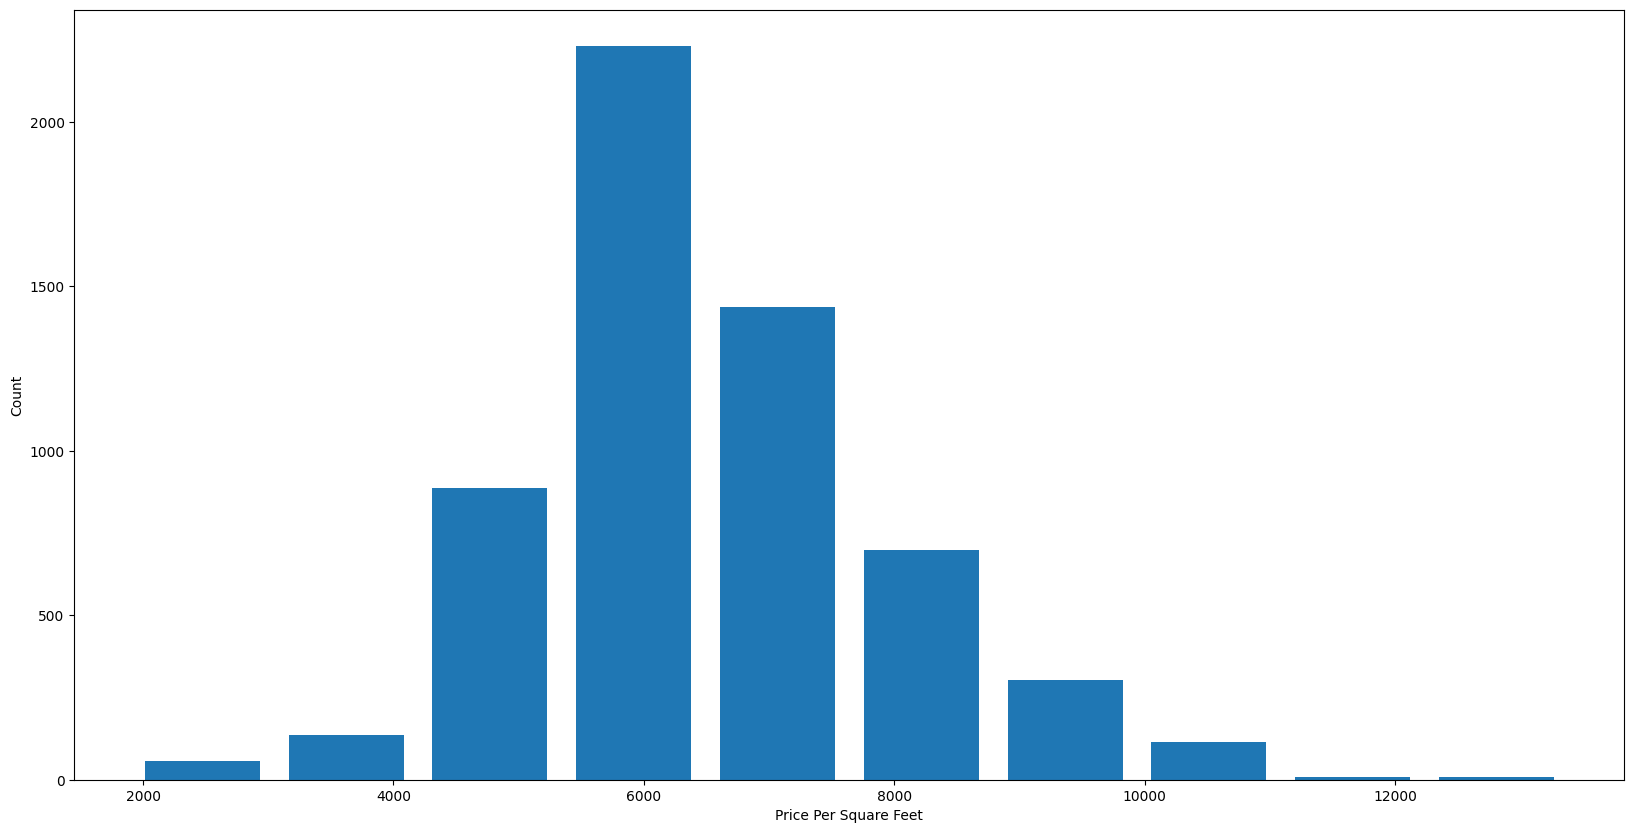

In [ ]:
#Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Using domain knowledge for outlier removal
* Generally number of bathrooms per BHK are (no of BHK) + 2.
* So using above understanding we can identify the outliers and remove them

In [ ]:
#Get unique bath from dataset
df11.bath.unique()

array([ 3.,  2.,  7.,  4.,  6.,  1.,  5.,  8.,  9., 12., 10., 16., 13.])

In [ ]:
#Get the training examples where no of bath are more than (no of BHK +2)
df11[df11.bath > df11.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1394,Bahria Town,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6230,Model Town,6 BHK,11338.0,9.0,1000.0,6,8819.897689
10312,Valencia,3 BHK,1806.0,6.0,116.0,3,6423.034330


We can remove above outliers from the datset

In [ ]:
#Lets check current dataset shape before removing outliers
df11.shape

(5882, 7)

In [ ]:
# Remove the outliers with more than (no of BHK + 2) bathrooms
df12 = df11[df11.bath < (df11.bhk + 2)]
df12.shape

(5808, 7)

This concludes our data cleaning, lets drop unnecessary columns
* Since we have 'bhk' feature lets drop 'size'
* We have crerated 'price_per_sqft' for outlier detection and removal purpose, so we can also drop it.

In [ ]:
df13 = df11.drop(['size', 'price_per_sqft'], axis='columns')
df13.head()

,location,total_sqft,bath,price,bhk
0,Askari,1767.0,3.0,103.0,3
1,Askari,1240.0,2.0,70.0,2
2,Askari,1630.0,2.0,98.0,3
4,Askari,4000.0,7.0,225.0,7
6,Askari,2000.0,3.0,175.0,3


## One Hot Encoding
Since we have 'location' as categorical feature lets use One Hot Encoding to create separate column for each location category and assign binary value 1 or 0

In [ ]:
dummies = pd.get_dummies(df13.location)
dummies.head()

,Askari,Bahria Town,Cantt,DHA,Garden Town,Gulberg,Iqbal Town,Johar Town,Model Town,NFC,Old City,Others,Samnabad,Valencia,Wapda Town
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#To avoid dummy variable trap problem lets delete the one of the dummy variable column
dummies = dummies.drop(['Others'],axis='columns')
dummies.head()

,Askari,Bahria Town,Cantt,DHA,Garden Town,Gulberg,Iqbal Town,Johar Town,Model Town,NFC,Old City,Samnabad,Valencia,Wapda Town
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Now lets add dummies dataframe to original dataframe
df14 = pd.concat([df13,dummies],axis='columns')
df14.head()

,location,total_sqft,bath,price,bhk,Askari,Bahria Town,Cantt,DHA,Garden Town,Gulberg,Iqbal Town,Johar Town,Model Town,NFC,Old City,Samnabad,Valencia,Wapda Town
0,Askari,1767.0,3.0,103.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Askari,1240.0,2.0,70.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Askari,1630.0,2.0,98.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Askari,4000.0,7.0,225.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Askari,2000.0,3.0,175.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Lets delete the location feature
df15 = df14.drop(['location'],axis='columns')
df15.head()

,total_sqft,bath,price,bhk,Askari,Bahria Town,Cantt,DHA,Garden Town,Gulberg,Iqbal Town,Johar Town,Model Town,NFC,Old City,Samnabad,Valencia,Wapda Town
0,1767.0,3.0,103.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1240.0,2.0,70.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1630.0,2.0,98.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4000.0,7.0,225.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2000.0,3.0,175.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#Step#5: Build Machine Learning Model


In [ ]:
#Final shape of our dataset is
df15.shape

(5882, 18)

Now leats create X(independent variable/features) and y(dependent variables/target)

In [ ]:
X = df15.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,Askari,Bahria Town,Cantt,DHA,Garden Town,Gulberg,Iqbal Town,Johar Town,Model Town,NFC,Old City,Samnabad,Valencia,Wapda Town
0,1767.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1240.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1630.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4000.0,7.0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2000.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df15.price
y.head()

0    103.0
1     70.0
2     98.0
4    225.0
6    175.0
Name: price, dtype: float64

### Split the dataset to training andtest dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (4705, 17)
X_test shape =  (1177, 17)
y_train shape =  (4705,)
y_test shape =  (1177,)


## Linear Regression
* Lets test the score with LinearRegression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8733774937261956

### Use K Fold cross validation to measure accuracy of our LinearRegression model
* Using Sklearn cross_val_score function
* Note: Sklearn's cross_val_score uses StratifiedKFold by default

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.85206327, 0.86866338, 0.86236317, 0.84959435, 0.82853158])

**Based on above results we can say that LinearRegression gives the best score. Hence we will use that**.

## Step#6: Testing The model
* Since all our locations are now columns in form of dummy variabales, all other dummy variables value should be 0 except the one(dummy variable column for our location) we are predicting for
* This(np.where(X.columns==location)[0][0]) code will give us index of dummy column for our location
* Now we will assign value '1' to this index and keep all other dummy variable columns as '0'

In [ ]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('DHA',5000, 6, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


328.3932211806246

In [ ]:
predict_price('DHA',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.53140449894592

In [ ]:
predict_price('Gulberg',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.53152928616963

In [ ]:
predict_price('Askari',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.86915711031604

In [ ]:
predict_price('Askari',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.20473974093696

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the predict_price function
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

# Create input widgets
location_widget = widgets.Dropdown(options=X.columns, description='Location:')
sqft_widget = widgets.IntSlider(min=0, max=5000, step=100, description='Sqft:')
bath_widget = widgets.IntSlider(min=0, max=10, step=1, description='Bathrooms:')
bhk_widget = widgets.IntSlider(min=1, max=30, step=1, description='BHK:')

# Function to handle widget changes and perform prediction
def predict_button_click(change):
    location = location_widget.value
    sqft = sqft_widget.value
    bath = bath_widget.value
    bhk = bhk_widget.value

    predicted_price = predict_price(location, sqft, bath, bhk)

    result_widget.value = f"Predicted Price in lakhs {predicted_price}"

# Create a button widget
predict_button = widgets.Button(description='Predict')

# Register the callback function to the button's on-click event
predict_button.on_click(predict_button_click)

# Create a label widget to display the result
result_widget = widgets.Label()

# Display the widgets
display(location_widget, sqft_widget, bath_widget, bhk_widget, predict_button, result_widget)


Dropdown(description='Location:', options=('total_sqft', 'bath', 'bhk', 'Askari', 'Bahria Town', 'Cantt', 'DHA…

IntSlider(value=0, description='Sqft:', max=5000, step=100)

IntSlider(value=0, description='Bathrooms:', max=10)

IntSlider(value=1, description='BHK:', max=30, min=1)

Button(description='Predict', style=ButtonStyle())

Label(value='')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
